# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

from text_classification.crnn.train import trainIters

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='float32')

Plot the training data

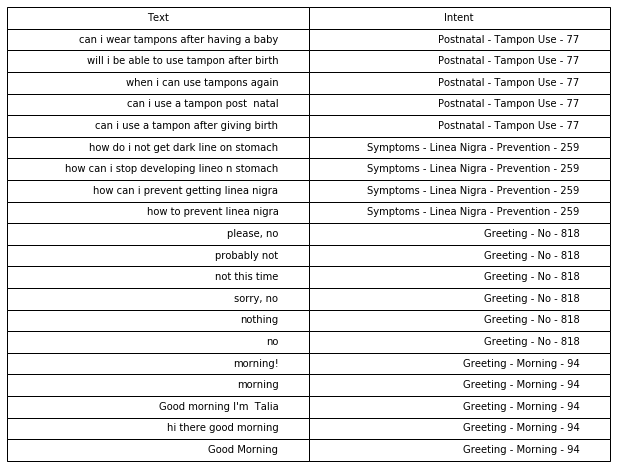

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

Start training the classification model and save

In [7]:
training_data = [(item, y_train[idx]) for idx, item in enumerate(X_train)]

model = trainIters(training_data, classes, n_iters=100, log_every=5, verbose=1, learning_rate=1e-3, batch_size=64)

Importing /Users/2359media/Documents/botbot-nlp/data/glove/glove.6B.300d.pickle...
12m 38s (- 240m 8s) (5 5%) 1175.5820 - acurracy: 0.0057
25m 30s (- 229m 37s) (10 10%) 1155.0831 - acurracy: 0.0093
36m 34s (- 207m 13s) (15 15%) 1118.2596 - acurracy: 0.0167
48m 28s (- 193m 52s) (20 20%) 1053.2166 - acurracy: 0.0393
59m 41s (- 179m 3s) (25 25%) 978.7710 - acurracy: 0.0611
70m 37s (- 164m 47s) (30 30%) 894.3135 - acurracy: 0.0996
81m 17s (- 150m 58s) (35 35%) 785.2336 - acurracy: 0.1465
91m 46s (- 137m 39s) (40 40%) 681.4638 - acurracy: 0.1874
102m 13s (- 124m 56s) (45 45%) 595.8748 - acurracy: 0.2389
112m 44s (- 112m 44s) (50 50%) 534.2769 - acurracy: 0.2960
135m 39s (- 110m 59s) (55 55%) 477.9754 - acurracy: 0.3614
150m 23s (- 100m 15s) (60 60%) 422.1600 - acurracy: 0.4197
168m 17s (- 90m 37s) (65 65%) 371.6896 - acurracy: 0.4827
195m 51s (- 83m 56s) (70 70%) 329.1746 - acurracy: 0.5320
212m 28s (- 70m 49s) (75 75%) 291.3045 - acurracy: 0.5820
229m 6s (- 57m 16s) (80 80%) 259.7833 - acu

Test the trained model

In [8]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from common.utils import argmax

from text_classification.crnn.predict import *

TEST_SENTENCE = 'I have a fever'

tokens_in = wordpunct_tokenize(TEST_SENTENCE)
sentence_in = prepare_vec_sequence(tokens_in, word_to_vec, SENTENCE_DIM, output='variable')
result = model(sentence_in)
result = F.softmax(result, dim=1)
max_idx = argmax(result)
print((classes[max_idx], result[0][max_idx]))

ValueError: Expected 4D tensor as input, got 3D tensor instead.

Getting the top 5 results

In [ ]:
from common.utils import to_scalar

topk_probs, topk_idxs = result.topk(5, dim=1)

for idx, result_idx in enumerate(topk_idxs[0]):
    print((classes[to_scalar(result_idx)], topk_probs[0][idx]))